In [1]:
import pandas as pd
import autoplier.model as ap
import mygene
import json
import csv
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, average_precision_score
import numpy as np

In [2]:
gtex = pd.read_csv("GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct", skiprows = 2,sep = "\t" ,header = 0)

In [3]:
gtex.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
1,ENSG00000227232.5,WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
2,ENSG00000278267.1,MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [4]:
gtex = gtex.set_index("Name")

In [5]:
gtex = gtex.drop("Description", axis = 1)

In [6]:
gtex.head()

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
ENSG00000227232.5,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,10.04,12.50000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
ENSG00000278267.1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
ENSG00000243485.5,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,0.00,0.06265,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
ENSG00000237613.2,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,0.00,0.00000,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [7]:
metadata = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep = "\t", index_col = "SAMPID")

In [8]:
metadata

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10a-SM-AHZ7F,NaN,"B1, A1",NaN,NaN,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10b-SM-CYKQ8,NaN,"B1, A1",NaN,7.2,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,BP-42319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K-562-SM-E9EZC,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26289400.0,27814300.0,0.002441,26121600.0,49.8400,0.006370,0.995167,NaN,0.0,50.2621
K-562-SM-E9EZI,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26653800.0,28341700.0,0.002336,26553400.0,49.9056,0.006806,0.994802,NaN,0.0,50.2046
K-562-SM-E9EZO,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,14317500.0,15168000.0,0.001731,14163500.0,49.7298,0.006662,0.994935,NaN,0.0,50.2412


In [9]:
metadata["SMTS"].value_counts()

Blood              3480
Brain              3326
Skin               2014
Esophagus          1582
Blood Vessel       1473
Adipose Tissue     1327
Heart              1141
Muscle             1132
Lung                867
Colon               821
Thyroid             812
Nerve               722
Breast              480
Testis              406
Stomach             381
Pancreas            360
Pituitary           301
Adrenal Gland       275
Prostate            262
Spleen              260
Liver               251
Bone Marrow         217
Ovary               195
Small Intestine     193
Salivary Gland      181
Vagina              173
Uterus              166
Kidney              104
Bladder              21
Cervix Uteri         19
Fallopian Tube        9
Name: SMTS, dtype: int64

In [10]:
pathway_genes = []
pathway_names = []

with open('c2.all.v7.5.1.entrez.gmt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        pathway_names += [row[0]]
        pathway_genes += [row[2:]]

In [11]:
mlb = MultiLabelBinarizer()
pathways = pd.DataFrame(mlb.fit_transform(pathway_genes), index = pathway_names, columns = mlb.classes_)

In [12]:
pathways

,1,10,100,1000,10000,100008586,100009676,10001,10002,10003,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
CORONEL_RFX7_DIRECT_TARGETS_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_UP,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_UP,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA_MMP_CYTOKINE_CONNECTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PROGRAMMED_CELL_DEATH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
SA_PTEN_PATHWAY,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_REG_CASCADE_OF_CYCLIN_EXPR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mg = mygene.MyGeneInfo()
genes = pathways.columns.tolist()
info = mg.getgenes(genes, fields="ensembl")

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-21728...done.


In [14]:
not_in_db = []
rename = {}
for x in info:
    if("ensembl" in x):
        y = x["ensembl"]
        if(type(y) == list):
            y = y[0]
        rename[x["query"]] = y["gene"]
    else:
        not_in_db += [x["query"]]

In [15]:
pathways = pathways.drop(columns = not_in_db)
pathways = pathways.rename(columns=rename)

In [16]:
pathways = pathways.groupby(level = 0, axis = 1).first()

In [17]:
pathways

,126231,55872,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000288705,ENSG00000288722,ENSG00000288825,ENSG00000288859,ENSG00000288905,ENSG00000288907,ENSG00000288920,ENSG00000289048,ENSG00000289313,ENSG00000289685
CORONEL_RFX7_DIRECT_TARGETS_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_DN,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA_MMP_CYTOKINE_CONNECTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PROGRAMMED_CELL_DEATH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PTEN_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_REG_CASCADE_OF_CYCLIN_EXPR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
gtex.index = [i.split(".")[0] for i in gtex.index.tolist()]

In [19]:
gtex = gtex[gtex.index.isin(pathways.columns)]
gtex = gtex[~gtex.index.duplicated(keep='first')]
gtex = gtex + 1
gtex = gtex.transform(lambda x: np.log(x))

In [20]:
pathways = pathways.T[pathways.columns.isin(gtex.index)].T

In [21]:
# Autoplier callbacks
callbacks = [
        #early stopping - to mitigate overfitting
        EarlyStopping(patience=100, monitor='val_loss'),
        #monitor umatrix sparsity
        ]

In [22]:
def train_autoplier(X_train,X_test, pathways, seed, n_LVs, regval = 1.20E-7 ):
    ap.set_seed_(seed)
    model = ap.autoPLIER(n_LVs, regval = regval,learning_rate= 0.000156)
    model.fit(X_train, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    Z_test = model.transform(X_test, pathways)
    Z_train = model.transform(X_train, pathways)
    print(ap.sparsity_epsilon(model.components_decomposition_, 0))
    
    return Z_train, Z_test

In [23]:
metadata = metadata[metadata.index.isin(gtex.columns)]

In [24]:
tissue_types = metadata["SMTS"].unique()

In [25]:
metadata["SMTS"]

SAMPID
GTEX-1117F-0226-SM-5GZZ7    Adipose Tissue
GTEX-1117F-0426-SM-5EGHI            Muscle
GTEX-1117F-0526-SM-5EGHJ      Blood Vessel
GTEX-1117F-0626-SM-5N9CS      Blood Vessel
GTEX-1117F-0726-SM-5GIEN             Heart
                                 ...      
GTEX-ZZPU-2126-SM-5EGIU              Ovary
GTEX-ZZPU-2226-SM-5EGIV             Vagina
GTEX-ZZPU-2426-SM-5E44I       Blood Vessel
GTEX-ZZPU-2626-SM-5E45Y             Muscle
GTEX-ZZPU-2726-SM-5NQ8O     Adipose Tissue
Name: SMTS, Length: 17382, dtype: object

In [26]:
def train_classifiers(train_target_full, test_target_full, train_data, test_data):
    
    test_precision = []
    test_recall = []
    aps = []
    fscores = []
    successful_celltypes = []
    unsuccessful_celltypes = []
    for tissue_type in tissue_types:
        
        
        
        train_target = train_target_full == str(tissue_type)
        test_target = test_target_full == str(tissue_type)

        if(1 in train_target.values and 1 in test_target.values and 0 in train_target.values and 0 in test_target.values):
        # lasso penalty

            clf = LogisticRegression(solver = "liblinear",penalty = "l2",random_state=111, max_iter = 1000)

            clf.fit(train_data, train_target)
            target_pred = clf.predict(test_data)
            target_probs = clf.predict_proba(test_data)[:,1]
            test_pr = average_precision_score(test_target, target_probs)
            test_precision += [precision_score(test_target, target_pred)]
            test_recall += [recall_score(test_target, target_pred)]
            aps += [average_precision_score(test_target, target_probs)]
            fscores += [fscore(test_precision[-1], test_recall[-1])]
            
            
            successful_celltypes += [tissue_type]
        else:
            unsuccessful_celltypes += [tissue_type]

    p = np.mean(test_precision)
    r = np.mean(test_recall)
    f= np.mean(fscores)
    f_micro = fscore(p, r) 
    ap = np.mean(aps)
    sd_f = np.std(f)
    sd_ap = np.std(aps)
    report = pd.DataFrame(list(zip(test_precision, test_recall, aps, fscores)), columns = ["precision",
             "recall","Average Precision","F1 score"], index = successful_celltypes)
    return(report)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(gtex.T, metadata["SMTS"], test_size=0.33, random_state=111)

In [28]:
# fscore metric used to evaluate classifiers
def fscore(p, r):
    denom = p + r or 1

    return 2*(p * r) / denom

In [29]:
X_train

,ENSG00000186092,ENSG00000228794,ENSG00000225880,ENSG00000230368,ENSG00000234711,ENSG00000223764,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000210184,ENSG00000198786,ENSG00000198695,ENSG00000198727
GTEX-14E6D-1026-SM-5S2RS,0.000000,2.237727,3.058237,0.526915,0.513961,1.781036,1.427436,4.063370,3.049747,1.060910,...,9.457279,9.938420,9.850140,9.185843,8.815964,9.649305,0.000000,8.133294,7.638680,9.237080
GTEX-146FR-1826-SM-5QGPF,0.205875,1.892509,1.319353,0.260208,0.494574,0.618478,0.598287,3.810655,2.526528,0.528744,...,10.236776,10.722188,10.539562,10.177742,9.836867,10.592150,0.465493,8.976389,9.173780,10.379442
GTEX-1HCU8-0726-SM-ADEIR,0.140979,1.799893,1.696533,0.024322,0.000000,0.371839,0.216079,4.082778,2.127398,0.702107,...,10.172789,10.635639,10.795096,9.876168,10.077063,10.738373,0.000000,8.296796,7.988543,10.213946
GTEX-13X6I-0011-R10a-SM-5PNWI,0.419368,2.255703,1.009417,0.127073,0.144533,0.187806,0.379053,3.762594,2.117339,0.106250,...,10.241780,10.794891,10.869730,9.824498,10.002020,10.608341,0.432042,8.992060,8.925321,10.260847
GTEX-RU72-1226-SM-2TF6N,0.067565,2.796061,2.238686,0.086985,0.210828,3.427515,3.014554,4.209309,2.129303,0.681833,...,9.689118,10.118639,10.060534,9.122711,9.379323,10.273705,0.736207,9.118115,9.511259,9.642188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-1CB4H-0126-SM-7IGN2,0.000000,1.741693,2.800933,0.042101,0.036351,0.847155,0.736207,4.238878,3.162517,1.026042,...,9.561772,10.102379,10.414243,9.651880,9.099967,9.968385,0.000000,7.768110,7.297768,9.428753
GTEX-14AS3-1026-SM-5TDD7,0.047923,2.384534,1.816615,0.031421,0.198687,1.080788,1.946767,4.212572,3.103689,0.234360,...,9.738082,10.351405,10.295563,9.573663,9.667829,10.458263,0.567471,8.641532,8.793157,10.088763
GTEX-14PJ6-1226-SM-6LLHJ,0.129448,2.146516,1.404380,0.058184,0.000000,1.081466,0.782073,3.921577,2.369683,0.527034,...,9.289244,9.738672,9.785886,9.538996,8.718337,9.488048,0.540520,8.650675,9.245804,9.392745
GTEX-1J8Q3-0126-SM-C1YSI,0.000000,1.948478,2.427454,0.065666,0.256346,3.132882,2.626840,4.208268,3.232384,1.270884,...,9.636327,10.105244,10.205479,9.124456,9.344084,10.160491,0.594486,8.491670,8.715880,9.660843


In [30]:
from sklearn.decomposition import PCA

In [31]:
gtex = gtex.T

In [32]:
pca = PCA(random_state=111)
pca.fit(gtex)

PCA(random_state=111)

In [33]:
totvar = sum(pca.explained_variance_)
cum_var = np.cumsum(pca.explained_variance_) / totvar

In [34]:
last = 0
for i, val in enumerate(cum_var):

        if (val >= 0.90 and val - last >= 0.01) :
            print(val,i)
            last = val
        if(val >= 0.95):
            break

0.9007806389086862 44
0.9114326303109016 53
0.9215408311507358 67
0.9318553645740938 91
0.9418761794417624 132


In [35]:
last = 0
LVrange = []
for i, val in enumerate(cum_var):

        if (val >= 0.90 and val - last >= 0.01) :
            LVrange += [i]
            last = val
        if(val >= 0.95):
            break

In [36]:
reports = []
for Lv in LVrange:
    print(Lv)
    Z_train, Z_test = train_autoplier(X_train,X_test, pathways, 111, Lv)
    
    report = train_classifiers(y_train, y_test, Z_train, Z_test)
    
    print(report.mean())
    
    reports += [report]

44
0.0


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision            0.888676
recall               0.884388
Average Precision    0.908305
F1 score             0.885649
dtype: float64
53
0.0


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision            0.896706
recall               0.895938
Average Precision    0.924360
F1 score             0.895828
dtype: float64
67
0.0
precision            0.948755
recall               0.918812
Average Precision    0.942242
F1 score             0.930331
dtype: float64
91
0.0


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision            0.912426
recall               0.895290
Average Precision    0.922464
F1 score             0.901862
dtype: float64
132
0.0


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision            0.934110
recall               0.920176
Average Precision    0.951016
F1 score             0.926580
dtype: float64


In [37]:
report_dfs = []

i = 0

for report in reports:
    report_dfs += [report.assign(Location = LVrange[i])]
    i += 1

In [39]:
import matplotlib.pyplot as plt

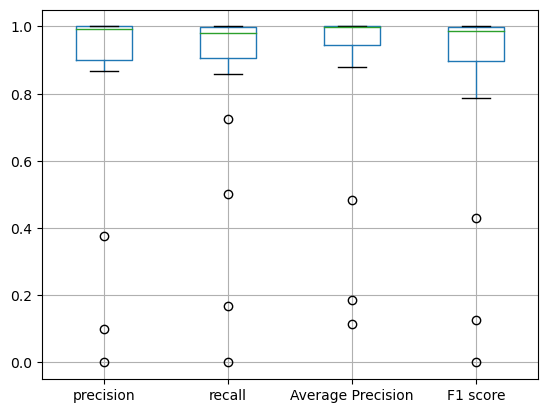

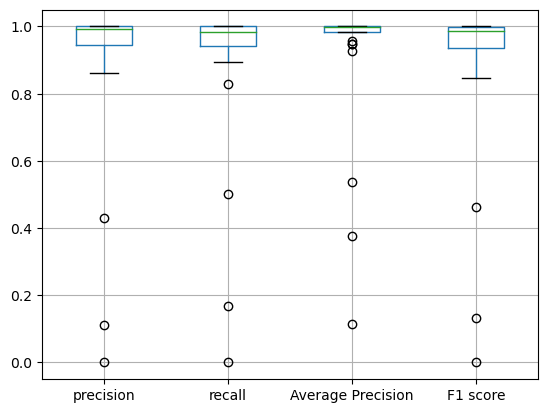

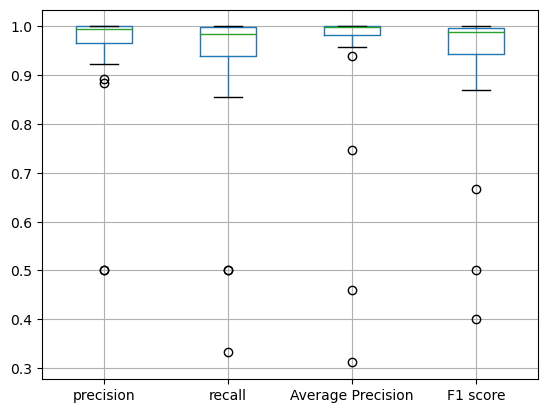

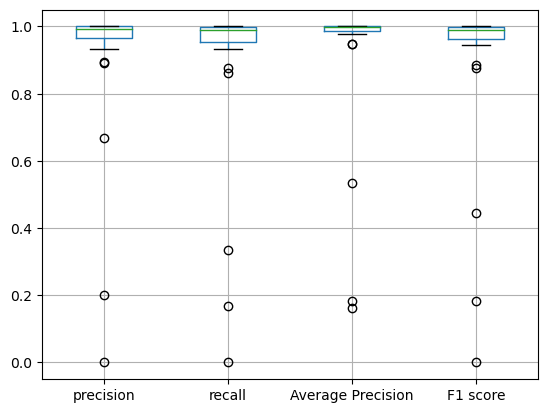

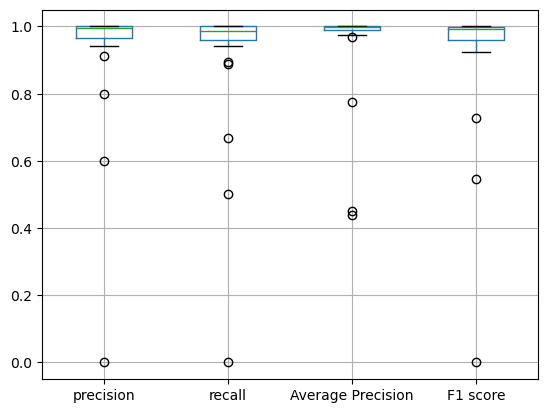

In [40]:
for report in reports:
    report.boxplot()
    plt.show()

In [43]:
def sparsity(z):
    s = (np.sum((z == 0).astype(int)).sum()) / float(z.size)
    return s